Single Image Processing
===


In [1]:
#from tools import init
import os
import tools
import glob
import cv2
import numpy as np
import pickle
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from scipy import signal
from collections import deque

### Finding the Lines

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tools import init
from detect_lane import Line, process_image_ex 

import imageio
#imageio.plugins.ffmpeg.download()
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML


In [16]:
Verbose=False
frame_Ind = 0;
img_width = 1280

init()

leftL = Line(327, img_width, 7)
rightL = Line(1018, img_width, 7)

In [17]:
def process_image(img):
    return process_image_ex(img, leftL, rightL, frame_Ind, verbose=Verbose)

In [18]:
out_dir='./'
output = out_dir + 'processed_project_video.mp4'
clip = VideoFileClip("project_video.mp4")
out_clip = clip.fl_image(process_image) 
%time out_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video ./processed_project_video.mp4
[MoviePy] Writing video ./processed_project_video.mp4


  1%|▉                                                                               | 15/1261 [00:02<03:28,  5.97it/s]

fit coeffs too far off [%] [ 0.8433103   0.3823718  -0.07236302]


  1%|█                                                                               | 16/1261 [00:02<03:32,  5.86it/s]

fit coeffs too far off [%] [ 0.81993925  0.37123941 -0.07470007]


  1%|█                                                                               | 17/1261 [00:02<03:35,  5.76it/s]

fit coeffs too far off [%] [ 0.85957973  0.40721735 -0.08675395]


  1%|█▏                                                                              | 18/1261 [00:03<03:35,  5.77it/s]

fit coeffs too far off [%] [ 0.81457058  0.36637581 -0.07222591]


  2%|█▉                                                                              | 30/1261 [00:05<03:26,  5.96it/s]

fit coeffs too far off [%] [ 0.86819428  0.41073965 -0.05531418]


  2%|█▉                                                                              | 31/1261 [00:05<03:28,  5.89it/s]

fit coeffs too far off [%] [ 0.94687286  0.47662031 -0.07797932]


  3%|██                                                                              | 32/1261 [00:05<03:31,  5.80it/s]

fit coeffs too far off [%] [ 1.09177074  0.48990861 -0.06742869]


 13%|██████████▎                                                                    | 164/1261 [00:28<03:03,  5.98it/s]

fit coeffs too far off [%] [ 0.71532473  0.38693654 -0.0752374 ]


 16%|████████████▎                                                                  | 196/1261 [00:33<02:56,  6.04it/s]

fit coeffs too far off [%] [-0.3915127  -0.31091442  0.17407916]


 16%|████████████▎                                                                  | 197/1261 [00:33<02:57,  6.01it/s]

fit coeffs too far off [%] [-0.32438989 -0.33617435  0.22346133]


 16%|████████████▍                                                                  | 198/1261 [00:33<03:02,  5.83it/s]

fit coeffs too far off [%] [-0.31727971 -0.36981032  0.25876269]


 16%|████████████▍                                                                  | 199/1261 [00:33<03:03,  5.79it/s]

fit coeffs too far off [%] [-0.42734835 -0.39553106  0.24365071]


 16%|████████████▌                                                                  | 200/1261 [00:34<03:04,  5.74it/s]

fit coeffs too far off [%] [-0.48380072 -0.42582531  0.24301041]


 16%|████████████▌                                                                  | 201/1261 [00:34<03:05,  5.72it/s]

fit coeffs too far off [%] [-0.37693289 -0.33536139  0.18205861]


 24%|███████████████████                                                            | 304/1261 [00:51<02:41,  5.93it/s]

fit coeffs too far off [%] [-0.77571065 -0.34399376  0.03353208]


 24%|███████████████████                                                            | 305/1261 [00:51<02:41,  5.93it/s]

fit coeffs too far off [%] [-0.95644274 -0.37059349  0.02015587]


 24%|███████████████████▏                                                           | 306/1261 [00:51<02:44,  5.79it/s]

fit coeffs too far off [%] [-0.95833876 -0.42788166  0.03629175]


 25%|███████████████████▍                                                           | 310/1261 [00:52<02:42,  5.86it/s]

fit coeffs too far off [%] [-0.73987487 -0.64336359  0.11981176]


 25%|███████████████████▍                                                           | 311/1261 [00:52<02:44,  5.78it/s]

fit coeffs too far off [%] [-0.56059892 -0.58672561  0.11731945]


 25%|███████████████████▌                                                           | 312/1261 [00:52<02:45,  5.75it/s]

fit coeffs too far off [%] [-0.60602577 -0.73851481  0.15100568]


 25%|███████████████████▌                                                           | 313/1261 [00:53<02:45,  5.71it/s]

fit coeffs too far off [%] [-0.77223986 -0.81238941  0.14558527]


 25%|███████████████████▋                                                           | 314/1261 [00:53<02:45,  5.71it/s]

fit coeffs too far off [%] [-0.91575129 -0.92106624  0.13904   ]


 25%|███████████████████▋                                                           | 315/1261 [00:53<02:45,  5.71it/s]

fit coeffs too far off [%] [-0.93553605 -0.92221104  0.12545527]


 25%|███████████████████▊                                                           | 316/1261 [00:53<02:45,  5.72it/s]

fit coeffs too far off [%] [-0.83383978 -0.8528287   0.10722793]


 25%|███████████████████▊                                                           | 317/1261 [00:53<02:44,  5.76it/s]

fit coeffs too far off [%] [ 0.93547564  0.20515158  0.00108472]


 25%|███████████████████▉                                                           | 319/1261 [00:54<02:42,  5.78it/s]

fit coeffs too far off [%] [-0.32706138  4.38318003  0.0232398 ]


 25%|████████████████████                                                           | 320/1261 [00:54<02:42,  5.79it/s]

fit coeffs too far off [%] [-1.29199794  6.97153224  0.02267036]


 26%|████████████████████▏                                                          | 323/1261 [00:54<02:40,  5.84it/s]

fit coeffs too far off [%] [-0.96088344 -0.49275043 -0.02003028]


 26%|████████████████████▎                                                          | 324/1261 [00:55<02:41,  5.79it/s]

fit coeffs too far off [%] [-0.92003378 -0.29225835 -0.01028023]


 26%|████████████████████▍                                                          | 326/1261 [00:55<02:44,  5.69it/s]

fit coeffs too far off [%] [-0.90752425 -0.37183391 -0.01473257]


 26%|████████████████████▌                                                          | 328/1261 [00:55<02:42,  5.74it/s]

fit coeffs too far off [%] [ 3.28868156 -0.11789823 -0.02151155]


 26%|████████████████████▌                                                          | 329/1261 [00:55<02:42,  5.72it/s]

fit coeffs too far off [%] [-0.91776417 -0.37292891  0.02058614]


 26%|████████████████████▋                                                          | 331/1261 [00:56<02:42,  5.72it/s]

fit coeffs too far off [%] [ 0.06527393  0.61976136  0.04596994]


 26%|████████████████████▊                                                          | 333/1261 [00:56<02:42,  5.73it/s]

fit coeffs too far off [%] [-1.11513154 -0.00518852  0.01525384]


 26%|████████████████████▉                                                          | 334/1261 [00:56<02:41,  5.73it/s]

fit coeffs too far off [%] [-4.21256511 -0.40773695 -0.01317707]


 27%|█████████████████████                                                          | 336/1261 [00:57<02:42,  5.70it/s]

fit coeffs too far off [%] [ -7.77694541e+00  -1.54840965e-01  -2.71275866e-03]


 27%|█████████████████████▏                                                         | 338/1261 [00:57<02:43,  5.63it/s]

fit coeffs too far off [%] [-0.7700043  -0.40207909  0.02827915]


 27%|█████████████████████▏                                                         | 339/1261 [00:57<02:41,  5.70it/s]

fit coeffs too far off [%] [-1.0925853   0.02743172  0.02097105]
fit coeffs too far off [%] [-1.23180854 -0.47051527  0.01931029]


 27%|█████████████████████▎                                                         | 341/1261 [00:58<02:44,  5.59it/s]

fit coeffs too far off [%] [-5.25757042 -0.17346599  0.02948952]
fit coeffs too far off [%] [ 1.30274099  0.43123428 -0.01813907]


 27%|█████████████████████▍                                                         | 342/1261 [00:58<02:45,  5.56it/s]

fit coeffs too far off [%] [ -7.67811926e+00  -5.28788407e-01  -1.10159164e-03]
fit coeffs too far off [%] [ 1.60009975  0.43394426 -0.01152879]


 27%|█████████████████████▍                                                         | 343/1261 [00:58<02:46,  5.52it/s]

fit coeffs too far off [%] [ 0.7089262   0.20767343 -0.0060345 ]


 27%|█████████████████████▌                                                         | 344/1261 [00:58<02:45,  5.53it/s]

fit coeffs too far off [%] [-0.1070804  -1.12987545 -0.01204953]
fit coeffs too far off [%] [ 1.22698379  0.31834184 -0.00390087]


 27%|█████████████████████▌                                                         | 345/1261 [00:58<02:47,  5.48it/s]

fit coeffs too far off [%] [ 0.78989399  0.06974408  0.00941053]


 27%|█████████████████████▋                                                         | 346/1261 [00:58<02:47,  5.47it/s]

fit coeffs too far off [%] [-0.33167268 -1.06992403  0.01163066]


 28%|█████████████████████▉                                                         | 350/1261 [00:59<02:43,  5.59it/s]

fit coeffs too far off [%] [-0.40685721 -1.30867052  0.00285934]


 28%|█████████████████████▉                                                         | 351/1261 [00:59<02:42,  5.60it/s]

fit coeffs too far off [%] [-0.23130004 -0.55331163 -0.00266531]


 28%|██████████████████████                                                         | 353/1261 [01:00<02:39,  5.69it/s]

fit coeffs too far off [%] [-0.63608898 -1.44410674  0.00808909]


 28%|██████████████████████▏                                                        | 354/1261 [01:00<02:39,  5.69it/s]

fit coeffs too far off [%] [-0.92462605 -1.9706496   0.01698634]
fit coeffs too far off [%] [-0.7101822  -0.43628732  0.01593418]


 28%|██████████████████████▎                                                        | 356/1261 [01:00<02:39,  5.69it/s]

fit coeffs too far off [%] [ 12.10017392   3.0254162    0.04749074]


 28%|██████████████████████▍                                                        | 358/1261 [01:01<02:38,  5.69it/s]

fit coeffs too far off [%] [ 0.71214206  0.63323114  0.03432833]


 29%|██████████████████████▋                                                        | 362/1261 [01:01<02:35,  5.79it/s]

fit coeffs too far off [%] [-0.77399146 -0.35843171  0.00660944]


 29%|██████████████████████▉                                                        | 366/1261 [01:02<02:35,  5.76it/s]

fit coeffs too far off [%] [-0.72951897 -0.33011285  0.01058143]


 29%|██████████████████████▉                                                        | 367/1261 [01:02<02:37,  5.67it/s]

fit coeffs too far off [%] [-0.75759968 -0.39615442  0.01693863]


 30%|███████████████████████▎                                                       | 373/1261 [01:03<02:31,  5.84it/s]

fit coeffs too far off [%] [-1.15318981 -0.43668488  0.00865547]


 30%|███████████████████████▍                                                       | 374/1261 [01:03<02:33,  5.77it/s]

fit coeffs too far off [%] [-1.0349691  -0.41238897 -0.01480491]
fit coeffs too far off [%] [-1.12920835 -0.39042391  0.00320636]


 30%|███████████████████████▍                                                       | 375/1261 [01:04<02:38,  5.57it/s]

fit coeffs too far off [%] [-1.4443105  -0.46617193  0.00515726]
fit coeffs too far off [%] [-0.88180452 -0.15884079 -0.01423613]


 30%|███████████████████████▌                                                       | 376/1261 [01:04<02:37,  5.61it/s]

fit coeffs too far off [%] [-1.74429721 -0.54653054  0.00266299]
fit coeffs too far off [%] [-1.18518821 -0.34707651 -0.00929669]


 30%|███████████████████████▌                                                       | 377/1261 [01:04<02:38,  5.57it/s]

fit coeffs too far off [%] [ -2.15126292e+00  -6.90715294e-01  -5.92627299e-04]


 30%|███████████████████████▋                                                       | 378/1261 [01:04<02:40,  5.50it/s]

fit coeffs too far off [%] [-2.44920184 -0.83283052 -0.01369031]
fit coeffs too far off [%] [-0.79388334 -0.26771099 -0.0020384 ]


 30%|███████████████████████▋                                                       | 379/1261 [01:04<02:39,  5.55it/s]

fit coeffs too far off [%] [-2.83551403 -0.89216835 -0.01972345]
fit coeffs too far off [%] [-1.22683054 -0.48302161  0.00639956]


 30%|███████████████████████▊                                                       | 380/1261 [01:04<02:40,  5.49it/s]

fit coeffs too far off [%] [-3.19585651 -0.82563894 -0.02772756]
fit coeffs too far off [%] [-1.45587926 -0.57702456  0.0161157 ]


 30%|███████████████████████▊                                                       | 381/1261 [01:05<02:42,  5.43it/s]

fit coeffs too far off [%] [-1.52430687 -0.64900945  0.0310718 ]


 30%|███████████████████████▉                                                       | 382/1261 [01:05<02:41,  5.45it/s]

fit coeffs too far off [%] [ 0.14069135 -0.774944    0.00288354]


 30%|███████████████████████▉                                                       | 383/1261 [01:05<02:39,  5.51it/s]

fit coeffs too far off [%] [-2.86634068  0.78100436 -0.00501409]


 30%|████████████████████████                                                       | 384/1261 [01:05<02:40,  5.46it/s]

fit coeffs too far off [%] [ 0.01079609 -2.36817511 -0.00817858]


 31%|████████████████████████▏                                                      | 386/1261 [01:06<02:38,  5.52it/s]

fit coeffs too far off [%] [-0.05119693  2.20336329 -0.02174085]


 31%|████████████████████████▎                                                      | 388/1261 [01:06<02:36,  5.56it/s]

fit coeffs too far off [%] [ 0.1701642   0.80662434 -0.01614031]


 31%|████████████████████████▍                                                      | 390/1261 [01:06<02:34,  5.63it/s]

fit coeffs too far off [%] [-0.55404049 -0.64026846 -0.00148555]
fit coeffs too far off [%] [-1.78442147 -0.73426369  0.01154282]


 31%|████████████████████████▍                                                      | 391/1261 [01:06<02:33,  5.65it/s]

fit coeffs too far off [%] [-3.09266591 -1.23923612  0.01686679]


 31%|████████████████████████▌                                                      | 392/1261 [01:07<02:34,  5.61it/s]

fit coeffs too far off [%] [-4.62439568 -1.60569574  0.00743991]


 31%|████████████████████████▌                                                      | 393/1261 [01:07<02:33,  5.66it/s]

fit coeffs too far off [%] [ 0.66416771  1.06302318 -0.01989693]
fit coeffs too far off [%] [-3.89223067 -1.50792974  0.01152306]


 31%|████████████████████████▋                                                      | 394/1261 [01:07<02:34,  5.61it/s]

fit coeffs too far off [%] [ 0.42437529  1.02155368 -0.02414736]
fit coeffs too far off [%] [ -2.79327538e+00  -1.19043354e+00   2.12743966e-03]


 31%|████████████████████████▋                                                      | 395/1261 [01:07<02:34,  5.61it/s]

fit coeffs too far off [%] [ -2.43982644e+00  -1.08987351e+00  -8.11185885e-04]


 31%|████████████████████████▊                                                      | 396/1261 [01:07<02:35,  5.55it/s]

fit coeffs too far off [%] [ 0.49209198  0.60996249 -0.01646096]


 31%|████████████████████████▊                                                      | 397/1261 [01:07<02:35,  5.57it/s]

fit coeffs too far off [%] [  9.92263366e-01  -6.06816921e+00   3.10835995e-03]


 32%|████████████████████████▉                                                      | 399/1261 [01:08<02:32,  5.67it/s]

fit coeffs too far off [%] [-1.07072233 -2.46208227 -0.01255564]


 32%|█████████████████████████▏                                                     | 403/1261 [01:09<02:28,  5.77it/s]

fit coeffs too far off [%] [-1.03572293 -0.40883919 -0.00809452]
fit coeffs too far off [%] [-0.88914669 -0.5812234   0.00697858]


 32%|█████████████████████████▎                                                     | 404/1261 [01:09<02:31,  5.67it/s]

fit coeffs too far off [%] [-1.61402811 -0.84024578  0.002114  ]


 32%|█████████████████████████▎                                                     | 405/1261 [01:09<02:31,  5.64it/s]

fit coeffs too far off [%] [-0.98675711 -0.43849665 -0.00672732]
fit coeffs too far off [%] [-4.00590868 -1.62149983  0.01467962]


 32%|█████████████████████████▍                                                     | 406/1261 [01:09<02:33,  5.58it/s]

fit coeffs too far off [%] [-1.26698358 -0.46291611 -0.01544247]


 32%|█████████████████████████▍                                                     | 407/1261 [01:09<02:31,  5.64it/s]

fit coeffs too far off [%] [-0.74003587 -0.25175867 -0.01499965]
fit coeffs too far off [%] [-0.36852119 -0.54525021 -0.00538207]


 32%|█████████████████████████▌                                                     | 408/1261 [01:09<02:34,  5.54it/s]

fit coeffs too far off [%] [-0.82743592 -0.11411294 -0.02159231]


 32%|█████████████████████████▌                                                     | 409/1261 [01:10<02:34,  5.50it/s]

fit coeffs too far off [%] [ 2.09317377  0.85413072 -0.0231878 ]
fit coeffs too far off [%] [  1.49784976e+00  -5.22051163e+00   1.39937746e-03]


 33%|█████████████████████████▋                                                     | 411/1261 [01:10<02:31,  5.61it/s]

fit coeffs too far off [%] [ 1.84980122  0.9704919  -0.01899877]
fit coeffs too far off [%] [-2.35073533  1.4696914  -0.00710489]


 33%|█████████████████████████▊                                                     | 412/1261 [01:10<02:33,  5.53it/s]

fit coeffs too far off [%] [ 2.20379668  1.01565023 -0.00896307]


 33%|█████████████████████████▉                                                     | 414/1261 [01:11<02:33,  5.53it/s]

fit coeffs too far off [%] [-1.70993852 -0.47975073 -0.00678946]


 33%|█████████████████████████▉                                                     | 415/1261 [01:11<02:31,  5.59it/s]

fit coeffs too far off [%] [-1.58682113 -0.62637754  0.00459223]


 33%|██████████████████████████                                                     | 417/1261 [01:11<02:27,  5.71it/s]

fit coeffs too far off [%] [ 0.37551622  2.24403002  0.00783937]


 33%|██████████████████████████▏                                                    | 419/1261 [01:11<02:29,  5.63it/s]

fit coeffs too far off [%] [-0.55778433 -2.46713608 -0.0114591 ]


 33%|██████████████████████████▍                                                    | 421/1261 [01:12<02:29,  5.61it/s]

fit coeffs too far off [%] [ -1.52408282 -13.74011848  -0.02553678]


 34%|██████████████████████████▋                                                    | 425/1261 [01:12<02:25,  5.75it/s]

fit coeffs too far off [%] [ 0.8714872   0.11911609  0.00985133]


 34%|██████████████████████████▊                                                    | 427/1261 [01:13<02:26,  5.70it/s]

fit coeffs too far off [%] [-1.2616065  -0.65132861  0.00802627]


 34%|██████████████████████████▊                                                    | 428/1261 [01:13<02:25,  5.73it/s]

fit coeffs too far off [%] [-1.00351981 -0.74723431  0.00638412]
fit coeffs too far off [%] [-1.88805536 -0.86587397  0.00386049]


 34%|██████████████████████████▉                                                    | 429/1261 [01:13<02:28,  5.59it/s]

fit coeffs too far off [%] [-1.20635677 -0.87604171  0.01239393]


 34%|██████████████████████████▉                                                    | 430/1261 [01:13<02:27,  5.64it/s]

fit coeffs too far off [%] [-1.50099123 -0.79789919 -0.00958483]
fit coeffs too far off [%] [-1.04538736 -0.59199177  0.0095544 ]


 34%|███████████████████████████                                                    | 431/1261 [01:14<02:29,  5.55it/s]

fit coeffs too far off [%] [-1.78693396 -1.02036518  0.00400982]


 34%|███████████████████████████                                                    | 432/1261 [01:14<02:27,  5.61it/s]

fit coeffs too far off [%] [-1.60962269 -0.69492568 -0.01991342]


 34%|███████████████████████████▏                                                   | 433/1261 [01:14<02:26,  5.65it/s]

fit coeffs too far off [%] [ -3.13445372e+00  -1.50716802e+00   1.11351792e-03]


 34%|███████████████████████████▏                                                   | 434/1261 [01:14<02:26,  5.64it/s]

fit coeffs too far off [%] [ -3.70161960e+00  -1.69422495e+00   2.42319228e-03]
fit coeffs too far off [%] [ 1.45635177  0.52599295 -0.00196311]


 34%|███████████████████████████▎                                                   | 435/1261 [01:14<02:27,  5.59it/s]

fit coeffs too far off [%] [ 5.43489093  1.97655124 -0.01589063]


 35%|███████████████████████████▎                                                   | 436/1261 [01:14<02:27,  5.60it/s]

fit coeffs too far off [%] [ 0.18075165  0.53906329  0.03744122]
fit coeffs too far off [%] [ 2.11040893  1.43196179 -0.02634981]


 35%|███████████████████████████▍                                                   | 437/1261 [01:15<02:27,  5.59it/s]

fit coeffs too far off [%] [ 4.10561109  1.31447056 -0.01607816]


 35%|███████████████████████████▌                                                   | 439/1261 [01:15<02:28,  5.54it/s]

fit coeffs too far off [%] [ 1.267715    0.51787105 -0.01645094]


 35%|███████████████████████████▉                                                   | 445/1261 [01:16<02:18,  5.90it/s]

fit coeffs too far off [%] [ 1.05099042  0.42981219 -0.00288665]


 35%|███████████████████████████▉                                                   | 446/1261 [01:16<02:23,  5.66it/s]

fit coeffs too far off [%] [ 0.67124588  0.51647486 -0.0181502 ]


 36%|████████████████████████████▏                                                  | 449/1261 [01:17<02:23,  5.66it/s]

fit coeffs too far off [%] [-0.72038384 -0.1637721   0.02298681]
fit coeffs too far off [%] [-0.98791761 -0.22716782 -0.00636011]


 36%|████████████████████████████▏                                                  | 450/1261 [01:17<02:24,  5.61it/s]

fit coeffs too far off [%] [-0.73608872 -0.15405126  0.0253711 ]
fit coeffs too far off [%] [-0.84610725 -0.18178894 -0.0063892 ]


 36%|████████████████████████████▎                                                  | 451/1261 [01:17<02:25,  5.57it/s]

fit coeffs too far off [%] [-1.07622138 -0.34452923  0.01635847]
fit coeffs too far off [%] [-0.78189502 -0.16847328 -0.00248708]


 36%|████████████████████████████▎                                                  | 452/1261 [01:17<02:24,  5.62it/s]

fit coeffs too far off [%] [-1.18417708 -0.46288541 -0.00439665]
fit coeffs too far off [%] [-1.20433417 -0.41509089  0.0120692 ]


 36%|████████████████████████████▍                                                  | 453/1261 [01:17<02:25,  5.57it/s]

fit coeffs too far off [%] [-1.75246984 -0.60082562  0.00807532]
fit coeffs too far off [%] [-1.67499107 -0.43491506  0.00957294]


 36%|████████████████████████████▍                                                  | 454/1261 [01:18<02:25,  5.54it/s]

fit coeffs too far off [%] [-2.14161124 -0.67196345  0.00653551]


 36%|████████████████████████████▌                                                  | 455/1261 [01:18<02:24,  5.57it/s]

fit coeffs too far off [%] [-2.67474283 -0.6669153   0.00459555]
fit coeffs too far off [%] [-1.117859    1.63924844 -0.00542253]


 36%|████████████████████████████▋                                                  | 458/1261 [01:18<02:21,  5.66it/s]

fit coeffs too far off [%] [ -2.55307316e+00  -5.51442653e-01   4.79629406e-04]


 36%|████████████████████████████▊                                                  | 459/1261 [01:18<02:20,  5.71it/s]

fit coeffs too far off [%] [-3.29291697 -0.86817542  0.00756498]


 37%|████████████████████████████▉                                                  | 461/1261 [01:19<02:18,  5.76it/s]

fit coeffs too far off [%] [ 0.35028543 -0.92893459 -0.02356255]


 37%|████████████████████████████▉                                                  | 462/1261 [01:19<02:20,  5.69it/s]

fit coeffs too far off [%] [ 0.35906941 -1.49566695 -0.04737235]
fit coeffs too far off [%] [ 0.18500802  1.26087682  0.01784324]


 37%|█████████████████████████████                                                  | 463/1261 [01:19<02:21,  5.64it/s]

fit coeffs too far off [%] [ 0.04321594 -0.60742599 -0.02116624]
fit coeffs too far off [%] [ 0.77059464  2.22502926  0.00859857]


 37%|█████████████████████████████▏                                                 | 466/1261 [01:20<02:19,  5.71it/s]

fit coeffs too far off [%] [-0.51307275 -0.60361539 -0.00491935]


 37%|█████████████████████████████▎                                                 | 468/1261 [01:20<02:19,  5.70it/s]

fit coeffs too far off [%] [-0.74368732 -0.95048937 -0.00433861]


 37%|█████████████████████████████▍                                                 | 469/1261 [01:20<02:17,  5.77it/s]

fit coeffs too far off [%] [-0.23160692 -0.75133508 -0.03882214]


 37%|█████████████████████████████▍                                                 | 470/1261 [01:20<02:17,  5.77it/s]

fit coeffs too far off [%] [-0.80884176 -0.95422665 -0.00893674]


 37%|█████████████████████████████▌                                                 | 471/1261 [01:21<02:17,  5.74it/s]

fit coeffs too far off [%] [-0.96000583  0.49136152 -0.01996074]
fit coeffs too far off [%] [-1.63516204 -1.40040976 -0.01442196]


 37%|█████████████████████████████▌                                                 | 472/1261 [01:21<02:19,  5.66it/s]

fit coeffs too far off [%] [-0.88959768  0.38770152 -0.01915474]


 38%|█████████████████████████████▋                                                 | 473/1261 [01:21<02:20,  5.60it/s]

fit coeffs too far off [%] [-1.16696488  0.84122047 -0.00833719]
fit coeffs too far off [%] [ -1.13845271e+00  -1.43107199e+00   6.09749611e-04]


 38%|█████████████████████████████▋                                                 | 474/1261 [01:21<02:21,  5.58it/s]

fit coeffs too far off [%] [-1.44550792  0.53809716 -0.03337891]


 38%|█████████████████████████████▊                                                 | 475/1261 [01:21<02:20,  5.61it/s]

fit coeffs too far off [%] [-1.70110653  0.96835138 -0.01724723]
fit coeffs too far off [%] [ -3.81488379e+00   6.97959059e+00   4.89766553e-03]


 38%|█████████████████████████████▊                                                 | 476/1261 [01:21<02:20,  5.60it/s]

fit coeffs too far off [%] [-2.00139127  0.4750698  -0.0413675 ]


 38%|█████████████████████████████▉                                                 | 477/1261 [01:22<02:21,  5.54it/s]

fit coeffs too far off [%] [-2.53542968  0.39845086 -0.04261018]
fit coeffs too far off [%] [ 1.04557425  0.50839334  0.0072609 ]


 38%|██████████████████████████████▏                                                | 481/1261 [01:22<02:17,  5.66it/s]

fit coeffs too far off [%] [-1.32955364 -0.38357711  0.00431554]


 38%|██████████████████████████████▏                                                | 482/1261 [01:23<02:17,  5.66it/s]

fit coeffs too far off [%] [-0.76581347 -0.11863556  0.00663449]


 38%|██████████████████████████████▎                                                | 483/1261 [01:23<02:18,  5.63it/s]

fit coeffs too far off [%] [-3.99753084 -1.04053077 -0.00494624]


 38%|██████████████████████████████▎                                                | 484/1261 [01:23<02:20,  5.54it/s]

fit coeffs too far off [%] [-1.0898001  -0.40986014  0.00415835]


 38%|██████████████████████████████▍                                                | 485/1261 [01:23<02:24,  5.36it/s]

fit coeffs too far off [%] [ 0.35148069  2.72121122 -0.01743784]


 39%|██████████████████████████████▌                                                | 487/1261 [01:23<02:22,  5.43it/s]

fit coeffs too far off [%] [-0.4311232   0.73240299  0.06762675]
fit coeffs too far off [%] [-1.239548   -1.15188991 -0.00216325]


 39%|██████████████████████████████▌                                                | 488/1261 [01:24<02:22,  5.41it/s]

fit coeffs too far off [%] [-1.42211451  0.31363082  0.06910988]


 39%|██████████████████████████████▋                                                | 489/1261 [01:24<02:21,  5.45it/s]

fit coeffs too far off [%] [-0.90259899  0.5938774   0.07047392]
fit coeffs too far off [%] [-0.94766854 -0.48207318  0.00311669]


 39%|██████████████████████████████▋                                                | 490/1261 [01:24<02:21,  5.43it/s]

fit coeffs too far off [%] [-1.24326604  0.47675424  0.07110991]


 39%|██████████████████████████████▊                                                | 491/1261 [01:24<02:20,  5.48it/s]

fit coeffs too far off [%] [-1.55292999 -0.05421237  0.03388174]
fit coeffs too far off [%] [-2.73109062  0.31064279  0.0073687 ]


 39%|██████████████████████████████▉                                                | 493/1261 [01:25<02:20,  5.48it/s]

fit coeffs too far off [%] [-1.25557142 -0.32838025 -0.00836445]
fit coeffs too far off [%] [-1.45609496 -1.46129347  0.01614714]


 39%|██████████████████████████████▉                                                | 494/1261 [01:25<02:17,  5.57it/s]

fit coeffs too far off [%] [-3.00754391 -0.70837806 -0.0316413 ]


 39%|███████████████████████████████                                                | 495/1261 [01:25<02:16,  5.63it/s]

fit coeffs too far off [%] [-6.11469211 -0.93575745 -0.04450037]
fit coeffs too far off [%] [ 3.65489568  7.79971187 -0.01327777]


 39%|███████████████████████████████▏                                               | 497/1261 [01:25<02:14,  5.67it/s]

fit coeffs too far off [%] [-0.28953226  5.24403371  0.01536844]


 39%|███████████████████████████████▏                                               | 498/1261 [01:25<02:16,  5.59it/s]

fit coeffs too far off [%] [-0.64011269 -0.57939079  0.00650527]


 40%|███████████████████████████████▎                                               | 499/1261 [01:26<02:16,  5.59it/s]

fit coeffs too far off [%] [ 0.66533566 -3.13683699 -0.03451697]


 40%|███████████████████████████████▎                                               | 500/1261 [01:26<02:13,  5.68it/s]

fit coeffs too far off [%] [-0.54451256 -1.09581947  0.01923994]


 40%|███████████████████████████████▍                                               | 501/1261 [01:26<02:15,  5.60it/s]

fit coeffs too far off [%] [ 0.69992265  1.57434594 -0.03513577]
fit coeffs too far off [%] [-0.60575697 -1.65019255  0.02239034]


 40%|███████████████████████████████▌                                               | 504/1261 [01:27<02:15,  5.57it/s]

fit coeffs too far off [%] [ 0.33024864  0.69408792 -0.01021462]
fit coeffs too far off [%] [-0.76855558 -0.56521977 -0.00350466]


 40%|███████████████████████████████▋                                               | 506/1261 [01:27<02:15,  5.56it/s]

fit coeffs too far off [%] [-1.03318862 -0.62292825 -0.00155403]


 40%|███████████████████████████████▊                                               | 507/1261 [01:27<02:13,  5.63it/s]

fit coeffs too far off [%] [-2.46236941 -1.40788143 -0.00775753]


 40%|███████████████████████████████▉                                               | 509/1261 [01:27<02:12,  5.69it/s]

fit coeffs too far off [%] [ 0.64291319  1.87704484 -0.01370937]


 40%|███████████████████████████████▉                                               | 510/1261 [01:28<02:11,  5.73it/s]

fit coeffs too far off [%] [-1.12443338 -0.92903479  0.00404445]


 41%|████████████████████████████████                                               | 511/1261 [01:28<02:11,  5.69it/s]

fit coeffs too far off [%] [-1.25960241 -1.08832154  0.01298381]


 41%|████████████████████████████████                                               | 512/1261 [01:28<02:13,  5.63it/s]

fit coeffs too far off [%] [-1.18366852 -1.50870335  0.04872647]
fit coeffs too far off [%] [-0.76297981 -0.4880153  -0.00941801]


 41%|████████████████████████████████▏                                              | 513/1261 [01:28<02:14,  5.55it/s]

fit coeffs too far off [%] [-1.6859008  -1.64271527  0.03674046]
fit coeffs too far off [%] [ -9.43542666e-01  -7.00069073e-01  -8.15129332e-04]


 41%|████████████████████████████████▏                                              | 514/1261 [01:28<02:14,  5.56it/s]

fit coeffs too far off [%] [-1.29687471 -1.39158662  0.0424465 ]


 41%|████████████████████████████████▎                                              | 515/1261 [01:28<02:13,  5.57it/s]

fit coeffs too far off [%] [-2.93987467 -2.07437764  0.02029484]
fit coeffs too far off [%] [-5.06526955 -1.19290971  0.01360468]


 41%|████████████████████████████████▍                                              | 517/1261 [01:29<02:13,  5.58it/s]

fit coeffs too far off [%] [ -6.69132573e+00   2.67483060e+01  -8.42166258e-03]


 41%|████████████████████████████████▍                                              | 518/1261 [01:29<02:12,  5.60it/s]

fit coeffs too far off [%] [-0.75052112 -1.48649333 -0.01368126]


 41%|████████████████████████████████▌                                              | 519/1261 [01:29<02:12,  5.62it/s]

fit coeffs too far off [%] [-0.32787746  0.50511639  0.0221331 ]


 41%|████████████████████████████████▌                                              | 520/1261 [01:29<02:12,  5.61it/s]

fit coeffs too far off [%] [-1.53676726 -1.21579168  0.0060935 ]


 41%|████████████████████████████████▋                                              | 521/1261 [01:30<02:12,  5.59it/s]

fit coeffs too far off [%] [-1.07366678 -0.86624145  0.00879374]


 41%|████████████████████████████████▊                                              | 523/1261 [01:30<02:09,  5.68it/s]

fit coeffs too far off [%] [-0.98035382 -2.16438797  0.04452938]
fit coeffs too far off [%] [ 1.28551116  1.3046487  -0.02239186]


 42%|████████████████████████████████▊                                              | 524/1261 [01:30<02:11,  5.62it/s]

fit coeffs too far off [%] [-3.03341352 -5.73513481  0.0974116 ]


 42%|████████████████████████████████▉                                              | 525/1261 [01:30<02:10,  5.64it/s]

fit coeffs too far off [%] [-2.46752143 -4.1286046   0.0499048 ]


 42%|█████████████████████████████████▏                                             | 529/1261 [01:31<02:14,  5.46it/s]

fit coeffs too far off [%] [-0.87014203 -0.84360798  0.04091078]


 42%|█████████████████████████████████▏                                             | 530/1261 [01:31<02:15,  5.40it/s]

fit coeffs too far off [%] [-1.58382921 -1.01646565  0.00450701]
fit coeffs too far off [%] [-1.0084132  -0.97778445  0.04285605]


 42%|█████████████████████████████████▎                                             | 531/1261 [01:31<02:15,  5.38it/s]

fit coeffs too far off [%] [-2.0929199  -1.33333034  0.01421739]
fit coeffs too far off [%] [-1.22052294 -1.06730505  0.02107636]


 42%|█████████████████████████████████▎                                             | 532/1261 [01:32<02:16,  5.34it/s]

fit coeffs too far off [%] [ -2.66237305e+00  -1.55737625e+00   1.38332010e-03]
fit coeffs too far off [%] [-1.58112568 -1.32206035  0.01952445]


 42%|█████████████████████████████████▍                                             | 533/1261 [01:32<02:16,  5.32it/s]

fit coeffs too far off [%] [-3.34251814 -1.76064548 -0.02453967]
fit coeffs too far off [%] [-1.45657019 -1.23311825  0.01590738]


 42%|█████████████████████████████████▌                                             | 535/1261 [01:32<02:14,  5.38it/s]

fit coeffs too far off [%] [ 1.44292977  1.99701602  0.03027833]


 43%|█████████████████████████████████▋                                             | 537/1261 [01:32<02:08,  5.64it/s]

fit coeffs too far off [%] [ 0.90522706  0.87595236  0.01896002]


 43%|█████████████████████████████████▋                                             | 538/1261 [01:33<02:08,  5.64it/s]

fit coeffs too far off [%] [ -7.67935040e-01  -6.90618747e-01   6.60019795e-04]


 43%|█████████████████████████████████▊                                             | 539/1261 [01:33<02:06,  5.72it/s]

fit coeffs too far off [%] [-1.18598689 -1.37829697  0.05109825]
fit coeffs too far off [%] [-1.037104   -0.86968841 -0.01541667]


 43%|█████████████████████████████████▉                                             | 542/1261 [01:33<02:06,  5.67it/s]

fit coeffs too far off [%] [ 0.33523836  0.53447283  0.00975567]


 43%|██████████████████████████████████                                             | 543/1261 [01:34<02:07,  5.63it/s]

fit coeffs too far off [%] [ 0.69835544  0.7335584   0.01039413]


 43%|██████████████████████████████████▎                                            | 547/1261 [01:34<02:05,  5.68it/s]

fit coeffs too far off [%] [ -8.83288368e-01  -7.55471293e-01  -5.48972880e-04]


 44%|██████████████████████████████████▋                                            | 554/1261 [01:35<02:02,  5.78it/s]

fit coeffs too far off [%] [-1.33410727 -0.66879902 -0.00715247]


 44%|██████████████████████████████████▊                                            | 555/1261 [01:36<02:05,  5.64it/s]

fit coeffs too far off [%] [-1.48280695 -0.96760926 -0.03725018]


 44%|██████████████████████████████████▊                                            | 556/1261 [01:36<02:04,  5.64it/s]

fit coeffs too far off [%] [-1.61901414 -0.97980073 -0.04336075]


 44%|██████████████████████████████████▉                                            | 557/1261 [01:36<02:05,  5.61it/s]

fit coeffs too far off [%] [-1.19573847 -0.6588577   0.02237568]
fit coeffs too far off [%] [-1.68599061 -0.99219074 -0.0416812 ]


 44%|██████████████████████████████████▉                                            | 558/1261 [01:36<02:07,  5.53it/s]

fit coeffs too far off [%] [ 0.32253073  0.5002443  -0.07710151]
fit coeffs too far off [%] [-1.48876163 -0.78822797 -0.00959328]


 44%|███████████████████████████████████                                            | 559/1261 [01:36<02:08,  5.47it/s]

fit coeffs too far off [%] [ 0.14302454  1.34339526 -0.22419961]
Failed right line detection!


 44%|███████████████████████████████████                                            | 560/1261 [01:37<02:58,  3.94it/s]

fit coeffs too far off [%] [ 0.48184726  1.79770477 -0.25682049]


 44%|███████████████████████████████████▏                                           | 561/1261 [01:37<02:42,  4.32it/s]

fit coeffs too far off [%] [ 0.51213486  2.20182124 -0.30694353]


 45%|███████████████████████████████████▏                                           | 562/1261 [01:37<02:30,  4.64it/s]

fit coeffs too far off [%] [ 1.33200019  1.76318022 -0.19597897]
fit coeffs too far off [%] [-0.71170418 -0.39377397 -0.0138506 ]


 45%|███████████████████████████████████▎                                           | 563/1261 [01:37<02:23,  4.88it/s]

fit coeffs too far off [%] [ 0.9792537   0.65622764 -0.08043458]
fit coeffs too far off [%] [-0.63416932 -0.65701841 -0.08080157]


 45%|███████████████████████████████████▎                                           | 564/1261 [01:38<02:19,  5.01it/s]

fit coeffs too far off [%] [-2.60046941 -1.3679958  -0.15551325]


 45%|███████████████████████████████████▍                                           | 565/1261 [01:38<02:13,  5.20it/s]

fit coeffs too far off [%] [ 0.95292685  0.66677422  0.01108199]
fit coeffs too far off [%] [-2.22958362 -1.35557597 -0.18465786]


 45%|███████████████████████████████████▍                                           | 566/1261 [01:38<02:11,  5.27it/s]

fit coeffs too far off [%] [-2.06000705 -1.36509671 -0.20487234]


 45%|███████████████████████████████████▌                                           | 567/1261 [01:38<02:08,  5.40it/s]

fit coeffs too far off [%] [-0.86791926 -1.36073759  0.06935608]


 45%|███████████████████████████████████▋                                           | 570/1261 [01:39<02:00,  5.73it/s]

fit coeffs too far off [%] [-0.99747192 -0.92728407  0.04536845]
fit coeffs too far off [%] [-0.33112674 -0.61401348  0.04305728]


 45%|███████████████████████████████████▊                                           | 571/1261 [01:39<02:02,  5.64it/s]

fit coeffs too far off [%] [-1.58194141 -1.66763065  0.11706548]
fit coeffs too far off [%] [-0.42337587 -0.61078557  0.03398585]


 45%|███████████████████████████████████▉                                           | 573/1261 [01:39<02:01,  5.64it/s]

fit coeffs too far off [%] [-0.64887278 -0.64618818 -0.00617084]


 46%|████████████████████████████████████                                           | 575/1261 [01:39<02:00,  5.71it/s]

fit coeffs too far off [%] [-1.88276136 -2.29916964  0.0748212 ]


 46%|████████████████████████████████████                                           | 576/1261 [01:40<01:58,  5.77it/s]

fit coeffs too far off [%] [-1.1502683  -0.79856132 -0.0070008 ]


 46%|████████████████████████████████████▏                                          | 577/1261 [01:40<01:57,  5.84it/s]

fit coeffs too far off [%] [-2.91791387 -2.10348977 -0.10404294]
fit coeffs too far off [%] [-2.02634943 -1.59499923 -0.00618966]


 46%|████████████████████████████████████▏                                          | 578/1261 [01:40<01:58,  5.78it/s]

fit coeffs too far off [%] [-2.23549015 -1.73444842 -0.00464038]


 46%|████████████████████████████████████▎                                          | 579/1261 [01:40<01:59,  5.71it/s]

fit coeffs too far off [%] [ 0.0819712   0.66293681 -0.02063923]
fit coeffs too far off [%] [-2.29943578 -1.81724351  0.00526506]


 46%|████████████████████████████████████▎                                          | 580/1261 [01:40<01:58,  5.74it/s]

fit coeffs too far off [%] [-2.80993511 -1.89009876  0.00522348]


 46%|████████████████████████████████████▌                                          | 584/1261 [01:41<01:56,  5.80it/s]

fit coeffs too far off [%] [ 0.48711481  0.91148257  0.01933008]


 47%|████████████████████████████████████▊                                          | 587/1261 [01:42<01:56,  5.77it/s]

fit coeffs too far off [%] [-0.8115152  -0.73793951  0.11670772]


 47%|████████████████████████████████████▊                                          | 588/1261 [01:42<01:57,  5.70it/s]

fit coeffs too far off [%] [-1.04366248 -0.95913327  0.16196385]


 47%|████████████████████████████████████▉                                          | 589/1261 [01:42<01:57,  5.71it/s]

fit coeffs too far off [%] [-1.45386129 -1.41512743  0.26436921]


 47%|████████████████████████████████████▉                                          | 590/1261 [01:42<01:57,  5.70it/s]

fit coeffs too far off [%] [-1.46751111 -1.38091372  0.24520517]


 47%|█████████████████████████████████████                                          | 591/1261 [01:42<01:57,  5.70it/s]

fit coeffs too far off [%] [-1.45389731 -1.41019533  0.27863706]


 47%|█████████████████████████████████████                                          | 592/1261 [01:42<01:56,  5.73it/s]

fit coeffs too far off [%] [-1.39099166 -1.30531427  0.22856619]


 47%|█████████████████████████████████████▏                                         | 593/1261 [01:43<01:56,  5.75it/s]

fit coeffs too far off [%] [-1.25817942 -1.16395963  0.19992921]
fit coeffs too far off [%] [-0.87735204 -0.37656811  0.01327194]


 47%|█████████████████████████████████████▎                                         | 595/1261 [01:43<01:59,  5.59it/s]

fit coeffs too far off [%] [-0.58927486 -0.69726316 -0.0328174 ]


 47%|█████████████████████████████████████▍                                         | 597/1261 [01:43<01:57,  5.67it/s]

fit coeffs too far off [%] [ 1.03777409  4.61947549  0.01381154]


 48%|█████████████████████████████████████▌                                         | 599/1261 [01:44<01:55,  5.71it/s]

fit coeffs too far off [%] [ 1.3481431   1.58616826  0.03826648]
fit coeffs too far off [%] [ 1.33857798  0.76887349  0.02549929]


 48%|█████████████████████████████████████▌                                         | 600/1261 [01:44<01:56,  5.68it/s]

Failed right line detection!
fit coeffs too far off [%] [ 1.346573    0.81359482  0.03674518]


 48%|█████████████████████████████████████▋                                         | 601/1261 [01:44<02:40,  4.10it/s]

Failed right line detection!
fit coeffs too far off [%] [ 1.73081038  1.06690004  0.0483993 ]


 48%|█████████████████████████████████████▋                                         | 602/1261 [01:45<03:13,  3.40it/s]

Failed right line detection!
fit coeffs too far off [%] [ 2.1664817  1.3429099  0.0554901]


 48%|█████████████████████████████████████▊                                         | 603/1261 [01:45<03:36,  3.04it/s]

fit coeffs too far off [%] [ 0.33921223  0.56267655  0.06803228]
Failed right line detection!
fit coeffs too far off [%] [ 1.92839299  1.27120018  0.05339552]


 48%|█████████████████████████████████████▊                                         | 604/1261 [01:45<03:51,  2.84it/s]

fit coeffs too far off [%] [ 0.27218674  0.76648747  0.16446702]
fit coeffs too far off [%] [ 1.97411249  1.26991141  0.04590746]


 48%|█████████████████████████████████████▉                                         | 605/1261 [01:46<03:17,  3.32it/s]

fit coeffs too far off [%] [ 0.38175007  1.06931037  0.26968123]
fit coeffs too far off [%] [ 1.73643141  1.04747644  0.02738903]


 49%|██████████████████████████████████████▋                                        | 618/1261 [01:48<01:51,  5.76it/s]

fit coeffs too far off [%] [ 0.0654267   0.2340384   0.15985697]


 50%|███████████████████████████████████████▌                                       | 631/1261 [01:50<01:49,  5.76it/s]

fit coeffs too far off [%] [-0.36215973 -0.32572423 -0.16194323]


 50%|███████████████████████████████████████▌                                       | 632/1261 [01:50<01:54,  5.50it/s]

fit coeffs too far off [%] [-0.390988   -0.34360551 -0.16818324]


 76%|████████████████████████████████████████████████████████████▎                  | 962/1261 [02:47<00:50,  5.87it/s]

fit coeffs too far off [%] [-0.82722809 -0.28125417 -0.01069521]


 77%|████████████████████████████████████████████████████████████▋                  | 969/1261 [02:48<00:51,  5.67it/s]

fit coeffs too far off [%] [ 0.70825907  0.11644472 -0.00734919]


 77%|████████████████████████████████████████████████████████████▊                  | 971/1261 [02:48<00:51,  5.67it/s]

fit coeffs too far off [%] [-0.93583574 -0.33365999 -0.01849154]


 77%|████████████████████████████████████████████████████████████▉                  | 972/1261 [02:49<00:51,  5.60it/s]

fit coeffs too far off [%] [-1.33670576 -0.50513795 -0.03388256]


 77%|████████████████████████████████████████████████████████████▉                  | 973/1261 [02:49<00:51,  5.54it/s]

fit coeffs too far off [%] [-0.94464836 -0.43875606 -0.0798894 ]
fit coeffs too far off [%] [ 1.29234973  0.21553274  0.0036924 ]


 77%|█████████████████████████████████████████████████████████████                  | 974/1261 [02:49<00:53,  5.39it/s]

fit coeffs too far off [%] [-1.04763115 -0.4923076  -0.0858102 ]
fit coeffs too far off [%] [-2.76995659 -0.79647491 -0.04776866]


 77%|█████████████████████████████████████████████████████████████                  | 975/1261 [02:49<00:54,  5.25it/s]

fit coeffs too far off [%] [-1.26475779 -0.59079761 -0.09681646]
fit coeffs too far off [%] [-3.25249656 -0.79433345 -0.05012619]


 77%|█████████████████████████████████████████████████████████████▏                 | 976/1261 [02:49<00:54,  5.21it/s]

fit coeffs too far off [%] [-1.31122733 -0.62074459 -0.10275408]


 77%|█████████████████████████████████████████████████████████████▏                 | 977/1261 [02:50<00:54,  5.21it/s]

fit coeffs too far off [%] [-1.27821611 -0.5735189  -0.08364109]
fit coeffs too far off [%] [ 2.51814985  0.45057983  0.00276665]


 78%|█████████████████████████████████████████████████████████████▎                 | 978/1261 [02:50<00:54,  5.20it/s]

fit coeffs too far off [%] [-1.2534139  -0.56002608 -0.08757389]
fit coeffs too far off [%] [ 3.50776174  0.61553691  0.00548466]


 78%|█████████████████████████████████████████████████████████████▎                 | 979/1261 [02:50<00:53,  5.24it/s]

fit coeffs too far off [%] [ 3.55361179  0.81956805  0.01831909]


 78%|█████████████████████████████████████████████████████████████▍                 | 981/1261 [02:50<00:51,  5.42it/s]

fit coeffs too far off [%] [ 0.75496449 -0.08994495 -0.03979868]


 78%|█████████████████████████████████████████████████████████████▌                 | 982/1261 [02:51<00:51,  5.42it/s]

fit coeffs too far off [%] [  4.99711590e+00   5.08056980e-01   9.91475090e-04]


 78%|█████████████████████████████████████████████████████████████▌                 | 983/1261 [02:51<00:50,  5.47it/s]

fit coeffs too far off [%] [ 2.91549239  0.28883303 -0.0336215 ]


 78%|█████████████████████████████████████████████████████████████▉                 | 989/1261 [02:52<00:48,  5.66it/s]

fit coeffs too far off [%] [ 0.84466815  0.31867431 -0.01233413]


 79%|██████████████████████████████████████████████████████████████▌                | 999/1261 [02:54<00:46,  5.60it/s]

fit coeffs too far off [%] [-0.75487652 -0.41732846 -0.06968242]


 79%|█████████████████████████████████████████████████████████████▊                | 1000/1261 [02:54<00:47,  5.55it/s]

fit coeffs too far off [%] [-1.40933907 -0.83614262 -0.1265252 ]
fit coeffs too far off [%] [-0.7513452  -0.25234721 -0.0007813 ]


 79%|█████████████████████████████████████████████████████████████▉                | 1001/1261 [02:54<00:47,  5.52it/s]

fit coeffs too far off [%] [-1.44388992 -0.87452601 -0.15982131]


 79%|█████████████████████████████████████████████████████████████▉                | 1002/1261 [02:54<00:46,  5.52it/s]

fit coeffs too far off [%] [-0.56588522 -0.54722874 -0.17073945]


 80%|██████████████████████████████████████████████████████████████                | 1003/1261 [02:54<00:46,  5.55it/s]

fit coeffs too far off [%] [-0.42060511 -0.73882177 -0.244204  ]


 80%|██████████████████████████████████████████████████████████████                | 1004/1261 [02:54<00:46,  5.51it/s]

fit coeffs too far off [%] [-0.15969551 -0.49004269 -0.19813643]


 80%|██████████████████████████████████████████████████████████████▏               | 1006/1261 [02:55<00:46,  5.54it/s]

fit coeffs too far off [%] [  1.46956107e+00   4.48740915e-01  -5.45617975e-04]


 80%|██████████████████████████████████████████████████████████████▎               | 1007/1261 [02:55<00:45,  5.56it/s]

fit coeffs too far off [%] [ 4.76625398  1.30576026  0.13342361]


 82%|███████████████████████████████████████████████████████████████▌              | 1028/1261 [02:59<00:39,  5.86it/s]

fit coeffs too far off [%] [ 0.81278831  0.2837226  -0.00698623]


 82%|███████████████████████████████████████████████████████████████▋              | 1030/1261 [02:59<00:39,  5.79it/s]

fit coeffs too far off [%] [ 0.7074868   0.30239983 -0.00113493]


 84%|█████████████████████████████████████████████████████████████████▏            | 1054/1261 [03:03<00:35,  5.83it/s]

fit coeffs too far off [%] [ 0.70537195  0.13185696 -0.01123716]


 84%|█████████████████████████████████████████████████████████████████▎            | 1055/1261 [03:03<00:35,  5.78it/s]

fit coeffs too far off [%] [ 0.09133503  0.23479912  0.15540962]
fit coeffs too far off [%] [ 0.77440303  0.15714598 -0.01200329]


 84%|█████████████████████████████████████████████████████████████████▎            | 1056/1261 [03:03<00:36,  5.66it/s]

fit coeffs too far off [%] [-0.00712333  0.22651574  0.17351787]
fit coeffs too far off [%] [ 0.79413542  0.14761745 -0.01771671]


 84%|█████████████████████████████████████████████████████████████████▍            | 1057/1261 [03:04<00:36,  5.60it/s]

fit coeffs too far off [%] [ 0.12134138  0.22642825  0.16234483]
fit coeffs too far off [%] [ 0.99696502  0.21295492 -0.01293594]


 84%|█████████████████████████████████████████████████████████████████▍            | 1058/1261 [03:04<00:36,  5.53it/s]

fit coeffs too far off [%] [ 0.4911888   0.34729863  0.19512751]
fit coeffs too far off [%] [ 1.15208093  0.25659561 -0.01711302]


 84%|█████████████████████████████████████████████████████████████████▌            | 1059/1261 [03:04<00:37,  5.45it/s]

fit coeffs too far off [%] [ 0.59247255  0.36425434  0.2023059 ]
fit coeffs too far off [%] [ 1.17026074  0.27718006 -0.02064639]


 84%|█████████████████████████████████████████████████████████████████▌            | 1060/1261 [03:04<00:36,  5.43it/s]

fit coeffs too far off [%] [ 0.51332009  0.32079765  0.19096879]
fit coeffs too far off [%] [ 0.7110865   0.21354087 -0.02057587]


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1184/1261 [03:26<00:13,  5.84it/s]

fit coeffs too far off [%] [ 0.71733075  0.24428449  0.04548194]


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1232/1261 [03:34<00:04,  5.87it/s]

fit coeffs too far off [%] [-0.72365404 -0.31042672 -0.03300336]


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1241/1261 [03:35<00:03,  5.90it/s]

fit coeffs too far off [%] [-0.81189067 -0.35012662 -0.03188803]


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1242/1261 [03:35<00:03,  5.81it/s]

fit coeffs too far off [%] [-0.99520918 -0.37892892 -0.02669078]


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1243/1261 [03:36<00:03,  5.79it/s]

fit coeffs too far off [%] [-1.42321143 -0.59278589 -0.04704993]


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1244/1261 [03:36<00:02,  5.75it/s]

fit coeffs too far off [%] [-1.25205245 -0.54036684 -0.04084587]


 99%|█████████████████████████████████████████████████████████████████████████████ | 1245/1261 [03:36<00:02,  5.73it/s]

fit coeffs too far off [%] [ 0.72855306 -0.07865262 -0.03693055]
fit coeffs too far off [%] [-0.91574691 -0.4889214  -0.04025555]


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1247/1261 [03:36<00:02,  5.75it/s]

fit coeffs too far off [%] [ 1.08658724  0.02917733 -0.02068403]


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1252/1261 [03:37<00:01,  5.90it/s]

fit coeffs too far off [%] [-0.96089774 -0.43703882 -0.0541133 ]
fit coeffs too far off [%] [-1.34993364 -0.72830562 -0.03115128]


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1253/1261 [03:37<00:01,  5.77it/s]

fit coeffs too far off [%] [-0.70523782 -0.49942119 -0.07475625]
fit coeffs too far off [%] [-1.56217986 -0.80510758 -0.02478076]


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1254/1261 [03:38<00:01,  5.67it/s]

fit coeffs too far off [%] [-0.8978912  -0.51529279 -0.07151304]
fit coeffs too far off [%] [-1.39865938 -0.88194106 -0.03869241]


100%|█████████████████████████████████████████████████████████████████████████████▋| 1255/1261 [03:38<00:01,  5.64it/s]

fit coeffs too far off [%] [-1.10104514 -0.6095016  -0.0835671 ]
fit coeffs too far off [%] [-0.90992213 -0.68980033 -0.03484754]


100%|█████████████████████████████████████████████████████████████████████████████▋| 1256/1261 [03:38<00:00,  5.59it/s]

fit coeffs too far off [%] [-1.66730724 -0.82018425 -0.10012633]
fit coeffs too far off [%] [-0.35689122 -0.54816412 -0.03990042]


100%|█████████████████████████████████████████████████████████████████████████████▊| 1257/1261 [03:38<00:00,  5.55it/s]

fit coeffs too far off [%] [-1.4091176  -0.70865173 -0.08508424]


100%|█████████████████████████████████████████████████████████████████████████████▊| 1258/1261 [03:38<00:00,  5.54it/s]

fit coeffs too far off [%] [-1.06300455 -0.81879448 -0.10897235]


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [03:39<00:00,  5.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./processed_project_video.mp4 

Wall time: 3min 39s


pick value:  46145
peak before sigma:  321
peak_x after sigma:  327


C:\Development\Udacity\carnd\P4-Advanced-Lane-Finding\detect_lane.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  histogram = np.sum(binary[binary.shape[0]/2:,:], axis=0)


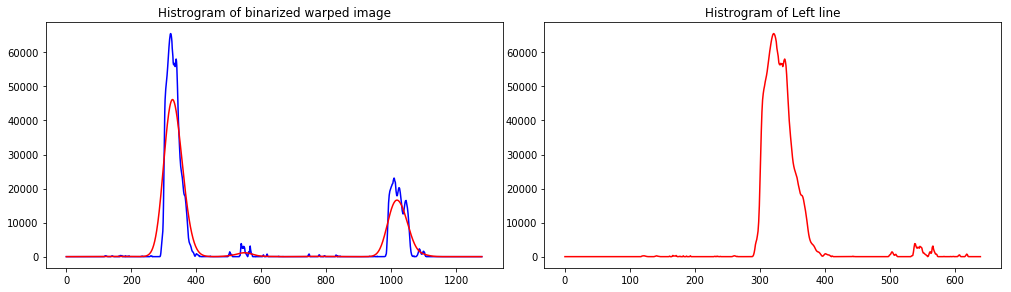

*** final peak_x:  327
pick value:  10971
peak before sigma:  1009
peak_x after sigma:  1018


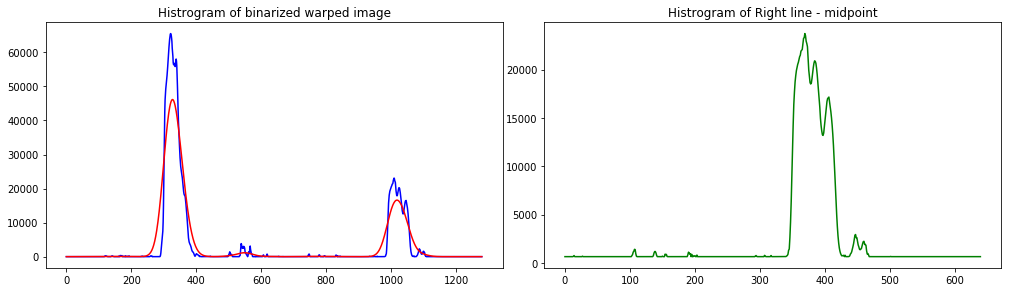

*** final peak_x:  1018


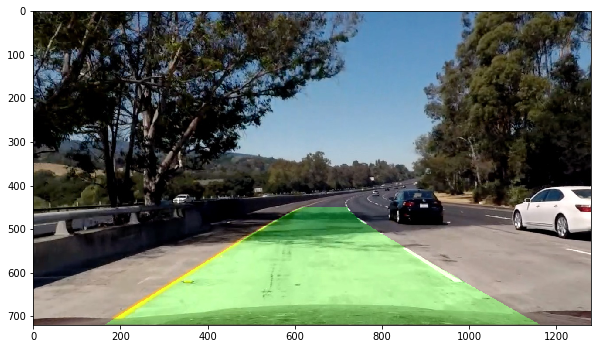

In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read in a thresholded image
img = mpimg.imread('test_images/test5.jpg')

img_width = img.shape[1]
leftL  = Line(327, img_width, 5)
rightL = Line(1018, img_width, 5)

result = process_image(img, leftL, rightL, 0, verbose=True)
result = process_image(img, leftL, rightL, 0, verbose=True)

plt.figure()
plt.figure(figsize=(10,8))
plt.imshow(result)
plt.show()
plt.imsave(out_dir + 'projected_lane_test5.jpg',result)

### Finding the lines using sliding window search